<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week2/BIOL470_modeled_neurons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIOL-470 (Week-2) Intro to modeling neuron activity!

This activity is modified from:
Rosenbaum, Robert. Modeling Neural Circuits Made Simple with Python. MIT Press, 2024.


1.   **Hi everyone! Welcome to your 2nd week activity: using Google Colab and Python to model neuronal activity and depolarization**

2.   You can use the activity outline in Canvas to get more detailed instructions and prompts on the activity

2.   Have fun and good luck!



# First we will load all the Python libraries for our code

In [59]:
#@title Click here to load libraries

###############################################
## Import packages and specify some settings ##
###############################################
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
#@title This code will add some nice formatting to the plots we generate

%matplotlib inline
sns.set(context='paper',style='white',font_scale=1.5,rc={"lines.linewidth":2.5})
sns.set_palette('muted')

# Now we will start to design a stimulus for our neuron

## Creating a consistent stimulus input

The units of time are in milli-seconds
The units of the current are in milli-amps

In [61]:
input_time = 600 # @param {type:"string"}
input_current = 4 # @param {type:"string"}
# Time-constant input current


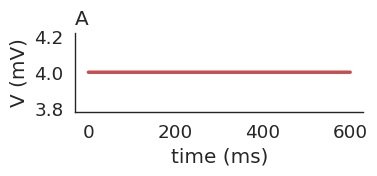

In [62]:
#@title Generate the plot

dt=.1
time=np.arange(0,int(input_time),dt)

plt.subplots(1,1,figsize=(4,2))
plt.subplot(1,1,1)
#plt.plot([0,0],[0,int(input_current)],color='r')
plt.plot(time,int(input_current)+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()

plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.tight_layout()

plt.savefig('fig1A.pdf')

The following code will define three parameters:

1. Equilibrium potential
2. Membrane time constant
3. Initial potential

In [63]:
# Neuron parameters
equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO


# Implementation of Leaky Integrator equation

The equation is implemented below

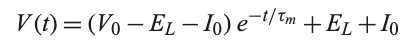

In [64]:
###############################################
          # Leaky integrator #
###############################################

# Compute Voltage
V=(initial_potential-equilibrium_potential-input_current)*np.exp(-time/membrane_time_constant)+equilibrium_potential+input_current


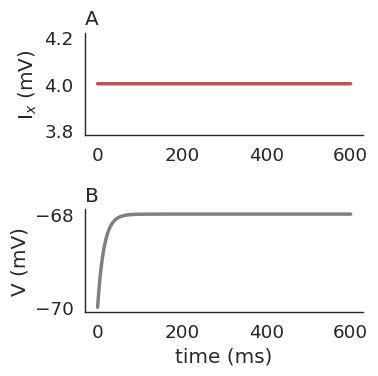

In [65]:
#@title Generate plot of current input and change in membrane potential
plt.subplots(2,1,figsize=(4,4))

plt.subplot(2,1,1)
plt.plot(time,input_current+0*time,color='r')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
plt.title('B',loc='left')
sns.despine()
plt.tight_layout()

plt.savefig('fig1B.pdf')

Now adding two new variables
1. spike_start: when your current is turned on
2. spike_end: when current is turned off

In [66]:
#@title Now create a simulation with time-varying input

# Discretized time

input_time = 600 # @param {type:"string"}
input_current = "0" # @param {type:"string"}

# Time-constant input current
dt=0.1
time=np.arange(0,input_time,dt)


spike_start = 100 # @param {type:"string"} #VO
spike_end = 400 # @param {type:"string"} #VO

# Time-varying input current
Ix=np.zeros_like(time)
Ix[(time>=spike_start) & (time<=spike_end)]=input_current

Do you want to change the properties of your neuron?

In [67]:
equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO


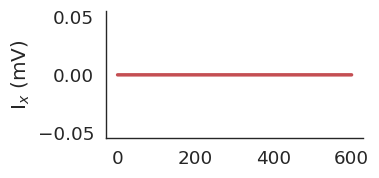

In [68]:
#@title Make plot of stimulus
plt.subplots(1,1,figsize=(4, 2))

plt.subplot(1,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.subplot(1,1,1)
plt.ylabel('I$_x$ (mV)')
#plt.title('C',loc='left')
sns.despine()
#plt.title('D',loc='left')

plt.tight_layout()
plt.savefig('fig2a.pdf')

In [69]:
#@title Calculate membrane potential from time-varying-input

# Define a convolution kernel over a shorter time duration
kernel_start = -5*membrane_time_constant
kernel_end = 5*membrane_time_constant
dt = 0.1

s=np.arange(kernel_start,kernel_end,dt)

k=(1/membrane_time_constant)*np.exp(-s/membrane_time_constant)*(s>=0)

# Define V by convolution
#V=(initial_potential-equilibrium_potential)
#*np.exp(-time/membrane_time_constant)+equilibrium_potential+
#np.convolve(Ix,k,mode='same')*dt

V=(initial_potential-equilibrium_potential)*np.exp(-time/membrane_time_constant)+equilibrium_potential+np.convolve(Ix,k,mode='same')*dt


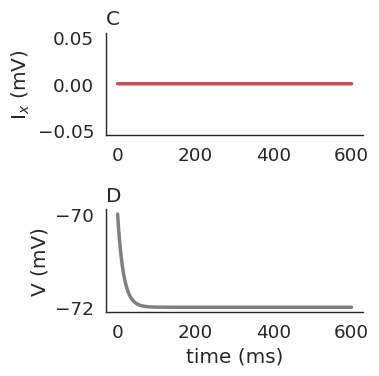

In [ ]:
#@title Make plot membrane potential
plt.subplots(2,1,figsize=(4, 4))

plt.subplot(2,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('D',loc='left')

plt.tight_layout()
plt.savefig('fig2b.pdf')

In [70]:
#@title Duration of stimulus
input_time = 1000 # @param {type:"string"}

In [84]:
#@title First time varying input

input_current = 5 # @param {type:"string"}


# Time-constant input current
dt=.1
time=np.arange(0,input_time,dt)

spike_start = 200 # @param {type:"string"} #VO
spike_end = 400 # @param {type:"string"} #VO




In [90]:
#@title Second time varying input
input_current2 = "8" # @param {type:"string"}
spike_start2 = 600 # @param {type:"string"} #VO
spike_end2 = 700 # @param {type:"string"} #VO

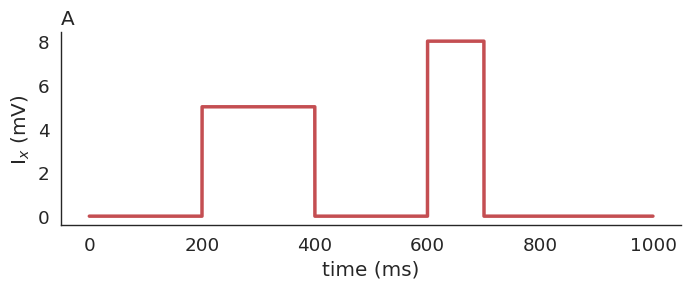

In [91]:
#@title Visualize Multiple Inputs

# Discretized time
T=1000
dt=.1
time=np.arange(0,T,dt)

# Applied current
Ix=np.zeros_like(time)
Ix[(time>=spike_start) & (time<=spike_end)]=input_current
Ix[(time>=spike_start2) & (time<=spike_end2)]=input_current2
plt.subplots(1,1,figsize=(8, 2.5))
plt.subplot(1,1,1)
plt.plot(time,Ix,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()

In [92]:
#@title Calculate Neuron Activity

# Define a convolution kernel over a shorter time duration
kernel_start = -5*membrane_time_constant
kernel_end = 5*membrane_time_constant
dt = 0.1

s=np.arange(kernel_start,kernel_end,dt)

k=(1/membrane_time_constant)*np.exp(-s/membrane_time_constant)*(s>=0)

# Define V by convolution
#V=(initial_potential-equilibrium_potential)
#*np.exp(-time/membrane_time_constant)+equilibrium_potential+
#np.convolve(Ix,k,mode='same')*dt

V=(initial_potential-equilibrium_potential)*np.exp(-time/membrane_time_constant)+equilibrium_potential+np.convolve(Ix,k,mode='same')*dt

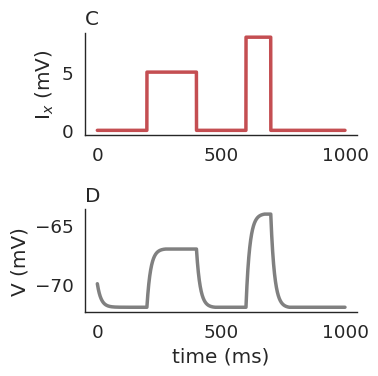

In [93]:
#@title Make for plot membrane potential
plt.subplots(2,1,figsize=(4, 4))

plt.subplot(2,1,1)
plt.plot(time,Ix,color='r')
#plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('C',loc='left')
sns.despine()


plt.subplot(2,1,2)
plt.plot(time,V,color='gray')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('D',loc='left')

plt.tight_layout()
plt.savefig('fig2b.pdf')

# Add spiking dynamics to our model

Option to change neuron parameters

In [94]:
equilibrium_potential = -72 # @param {type:"string"}
membrane_time_constant = 15 # @param {type:"string"}
initial_potential = -70 # @param {type:"string"} #VO


Here we are setting some new parameters for our spiking neuron simulation
1. Voltage Max - voltage neuron reaches after depolarization will reach
2. Voltage Reset - resting potential to return to
3. Voltage threshold - at what point an action potential is initiated
4. exp_coef - How quick does the neuron respond

In [95]:
voltage_spike_max=5 # @param {type:"string"}
voltage_reset=-75 # @param {type:"string"}
voltage_threshold=-55 # @param {type:"string"}
exp_coEfficient=2 # @param {type:"string"}

In [96]:
#@title Create spiking dynamics equation (Exponential Leaky Integrator)
V=np.zeros_like(time)
SpikeTimes=np.array([])
V[0]=initial_potential
Vth=voltage_spike_max

for i in range(len(time)-1):

    # Euler step
    #V[i+1]=V[i]+dt*(-(V[i]-EL)+D*np.exp((V[i]-VT)/D)+Ix[i])/taum

    V[i+1]=V[i]+dt*(-(V[i]-equilibrium_potential)+exp_coEfficient*np.exp((V[i]-voltage_threshold)/exp_coEfficient)+Ix[i])/membrane_time_constant
    # Threshold-reset condition
    if V[i+1]>=voltage_spike_max:
        V[i+1]=voltage_reset
        V[i]=voltage_spike_max  # This makes plots nicer
        SpikeTimes=np.append(SpikeTimes,time[i+1])







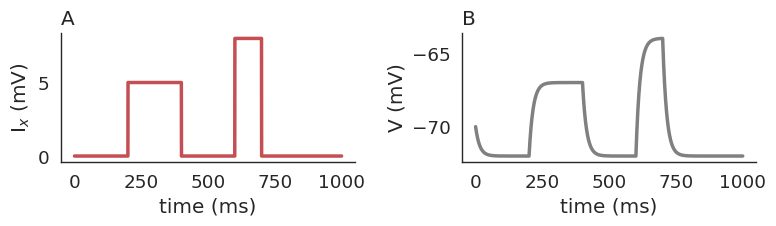

In [97]:
#@title Make figure of spiking model
plt.subplots(1,2,figsize=(8, 2.5))

plt.subplot(1,2,1)
plt.plot(time,Ix,color='r')
plt.xlabel('time (ms)')
plt.ylabel('I$_x$ (mV)')
plt.title('A',loc='left')
sns.despine()


plt.subplot(1,2,2)
plt.plot(time,V,color='gray')
plt.plot(SpikeTimes,Vth+1+0*SpikeTimes,'ro')
plt.xlabel('time (ms)')
plt.ylabel('V (mV)')
sns.despine()
plt.title('B',loc='left')
plt.tight_layout()
plt.savefig('fig3.pdf')

In [2]:
#@title make a video
import cv2 as cv
import numpy as np

# Creating timepoints
ss = [int(ele) for ele in np.linspace(0,len(V)-1,input_time)]
vl = len(ss)

# Sampling above spiking dynamics at specific time points
Vtemp = np.array(V)[ss]

# setting up video
vidOut = cv.VideoWriter('/content/spikeVid_2.mp4',cv.VideoWriter_fourcc('M','J','P','G'),75,(len(Vtemp),75))
vidOut2 = cv.VideoWriter('/content/spikeVid_1.mp4',cv.VideoWriter_fourcc('M','J','P','G'),75,(640,480))

# 75 for creating wide enough for visual
base = np.zeros((75,vl))

# will be updated with plot values of voltage
t_plot = []

# for each timepoint
for ind,ele in enumerate(Vtemp):

  # subtracting baseline and modifying value to be simulated neural activity
  # this is updating as a sliding space
  base[:,0]=ele-np.nanmin(Vtemp)

  if ind > 0:
    # if not first loop update base with new values
    base[:,1:]=b2[:,:len(Vtemp)-1]

  # sets b2 as modified base image
  b2 = base.copy()

  # video formatting
  bTemp = np.zeros((75,1000,3))
  for ee in range(0,3):
    bTemp[:,:,ee]=base
  vidOut.write(bTemp.astype(np.uint8))

  # making the top plot
  plt.subplot(2,1,1)
  temp = np.nansum(base,0)
  t_plot.append(temp)
  plt.plot(t_plot,color=(0.3,0.3,0.3),linewidth=1.5)
  plt.axis([-50,1050,-100,2150])

  # adding the visual at bottom
  plt.subplot(2,1,2)
  plt.imshow(base,vmax=35)
  plt.savefig('/content/temp.jpg')
  plt.close()
  img = cv.imread('/content/temp.jpg')
  vidOut2.write(img)
vidOut.release()
vidOut2.release()


NameError: name 'V' is not defined